In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Setup Tickers

In [2]:
from stockMarket.stockData import StockData

stock_data = StockData("S&P500")

### Download XML Files of Tickers

In [2]:
from stockMarket.ib import StoreXMLData

storeXMLData = StoreXMLData(stock_data.companies)
storeXMLData.save_xml_data()

### Retrieve chart from TV

0
1


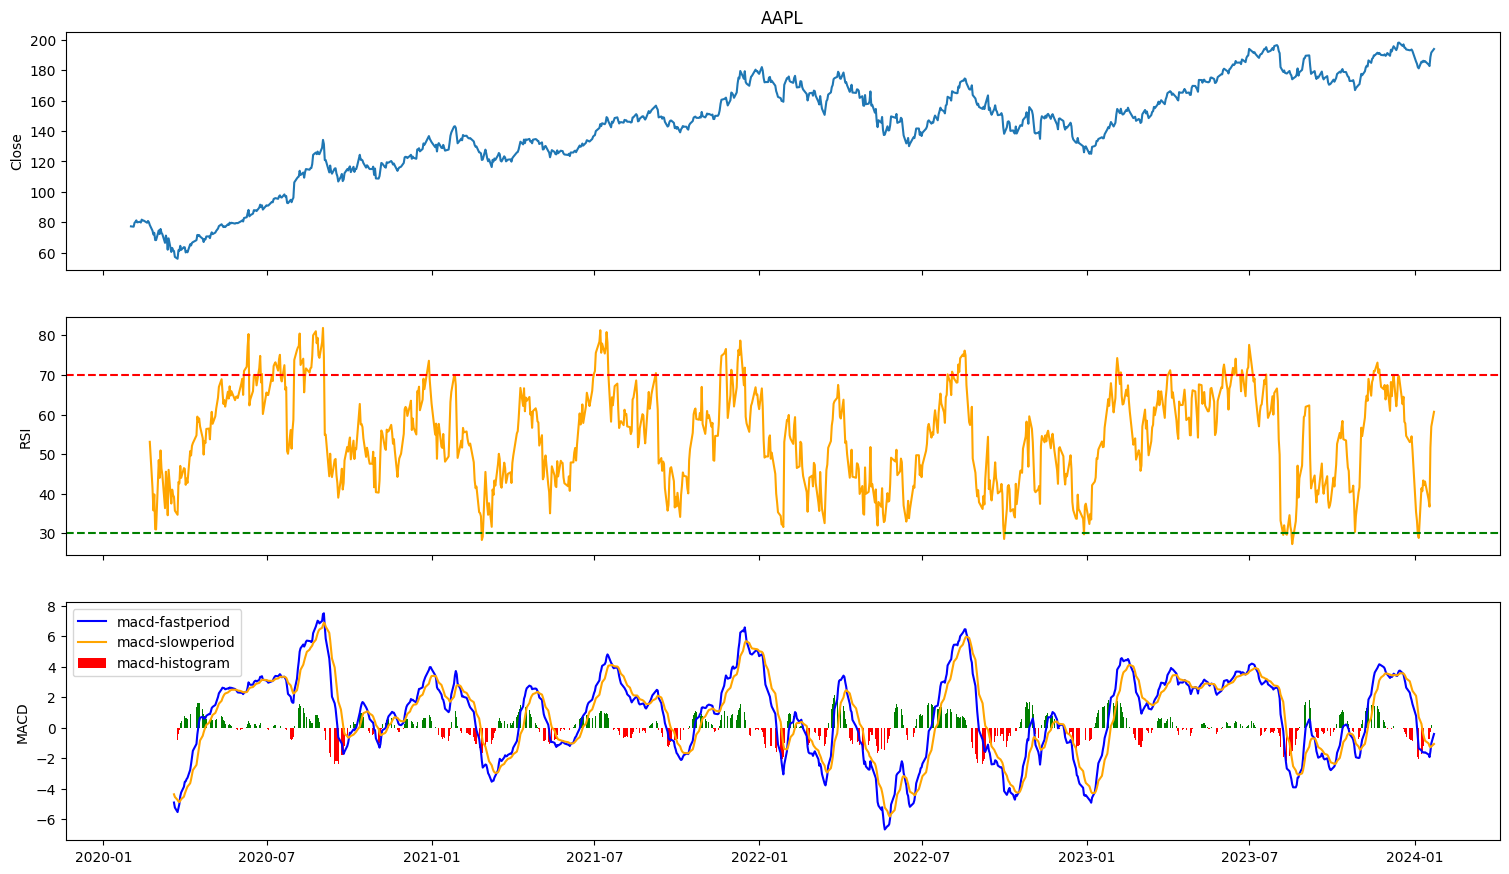

In [24]:
from stockMarket.core import Contract

contract = Contract(ticker="AAPL")
contract.init_pricing_data()
rsi = contract.rsi()
macd = contract.macd()
contract.plot(rsi=rsi, macd=macd)


### Retrieve Financial Data

In [9]:
from stockMarket.ib.finReports import FinReports

tickers = ["AAL", "AAPL", "AEP", "VLO"]
fin_reports = FinReports(tickers)
fin_reports.populate_contracts()
for i, ticker in enumerate(tickers):
    print(ticker, fin_reports.contracts[i].income.ebit)
    print(ticker, fin_reports.contracts[i].ebitda)
    print(ticker, fin_reports.contracts[i].income.revenue_growth)
    print(ticker, fin_reports.contracts[i].income.revenue_growth_full_time)


AAL [  1607.  -1059. -10421.   3065.   2656.   4231.]
AAL [ 3905.  1276. -8051.  5383.  4815.  6248.]
AAPL [114301. 119437. 108949.  66288.  63930.  70898.]
AAPL [125820. 130541. 120233.  77344.  76477.  81801.]
AEP [3482.7 3411.3 2987.7 2592.3 2682.7 3525. ]
AEP [6768.4 6322.3 5758.  5195.9 5083.1 5651.3]
VLO [15497.  2130. -1579.  3836.  4572.  3563.]
VLO [17970.  4535.   772.  6091.  6641.  5549.]
